<a href="https://colab.research.google.com/github/Reshmag026/My-Projects/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [2]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [4]:
train=pd.read_csv('/content/loan_data_train.csv')
train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [5]:
test=pd.read_csv('/content/loan_data_test.csv')
test.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


Problem Statement:
Predicing the interest rate

Sanity Check(Check for sufficient data)

In [6]:
train.shape,test.shape

((2200, 15), (300, 14))

Check for Logical relationships

In [10]:
### ID- Does not have a logical relationship with the target column Interest rate hence We can drop ID column

In [11]:
### State- Does not have a logical relationship with the target column hence We can drop the State column

In [12]:
### Loan Purpose -Need to understand from SME regarding the relationship

In [13]:
### FICO Score- Risk Indicator (Important)

In [14]:
### Open Credit Lines- Important

In [18]:
### Inquiries in the Last 6 Months- Doesn't seem to have any impact on target column so drop it.

EDA

Check for Missing Values

In [7]:
train.isna().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64

Identify the non_numeric columns

In [8]:
train.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [17]:
# Amount Requested- Convert into numeric
# Amount Fuunded- Convert into numeric
# Interest Rate- Remove the % sign and Convert into numeric
# Loan Length- Categorical column
# Loan Purpose- Object
# Debt to Income Ratio- Remove % sign and convert to numeric
# Home ownership- Object
# FICO- Risk Indicator (Important)- Take the mean of the range and convert to numeric
# Open Credit lines- Convert to Numeric (continuous/category)
# Revolving credit scores- Convert to Numeric
# Employment Length- Categorical column
# Employment Length- Categorical

Preprocessing

In [19]:
# Drop the ID,Inquiries in the Last 6 Months and State column

In [20]:
# First combine the train and test data and then preprocess.
# Before modeling we will again split the dataset into train and test and will train the model on traininig data only

In [9]:
train.columns=train.columns.str.replace('.','_')

In [22]:
# we are replacing the '.' from the column names with'_'

In [10]:
train.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [11]:
test.columns=test.columns.str.replace('.','_')

In [12]:
test.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [26]:
## we will create a dummy target column for test data

In [13]:
test['Interest_Rate']=np.nan

In [14]:
test.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Interest_Rate
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year,NaN
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years,NaN
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years,NaN
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years,NaN
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years,NaN


In [30]:
## we also add Dummy columns as a placeholder for train and test data
train['Data_Type']='Train'
test['Data_Type']='Test'

Combine the train and test data

In [31]:
df=pd.concat((train,test),ignore_index=True)
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train


Convert Amount Requested and Amount Funded -> Numeric

In [32]:
for i in ['Amount_Requested', 'Amount_Funded_By_Investors']:
    df[i]=pd.to_numeric(df[i],errors='coerce')

In [33]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
dtype: object

Interest Rate and Debt to Income ratio- Numeric

In [34]:
for i in ['Interest_Rate','Debt_To_Income_Ratio']:
    df[i]=df[i].str.replace('%','').astype(float)

In [35]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
Data_Type                          object
dtype: object

Loan Length-Categorical Column

In [36]:
df.Loan_Length.value_counts()

36 months    1950
60 months     548
.               1
Name: Loan_Length, dtype: int64

Since Loan length is a categorical column we have tomdecide whether we go for One Hot Encoding or Label Encoding

We have one row with . which needs to be replaced and we can replace it by 36 months when we use the mode method.

In [37]:
df.Loan_Length.replace('.','36 months',inplace=True)

In [38]:
df.Loan_Length.value_counts(dropna=False)

36 months    1951
60 months     548
NaN             1
Name: Loan_Length, dtype: int64

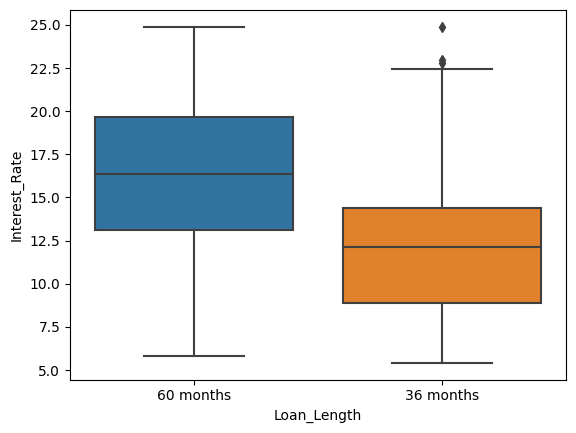

In [39]:
sns.boxplot(x=df[df.Data_Type=='Train']['Loan_Length'],y=df[df.Data_Type=='Train']['Interest_Rate'])
plt.show()

We will go with Label encoding as the data is ordinal(there is an order in the data)

In [40]:
df.Loan_Length=df.Loan_Length.apply(lambda x:0 if x=='36 months' else 1)

In [41]:
df.Loan_Length.value_counts(dropna=False)

0    1951
1     549
Name: Loan_Length, dtype: int64

Loan_Purpose- Categorical Data


In [42]:
df.Loan_Purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

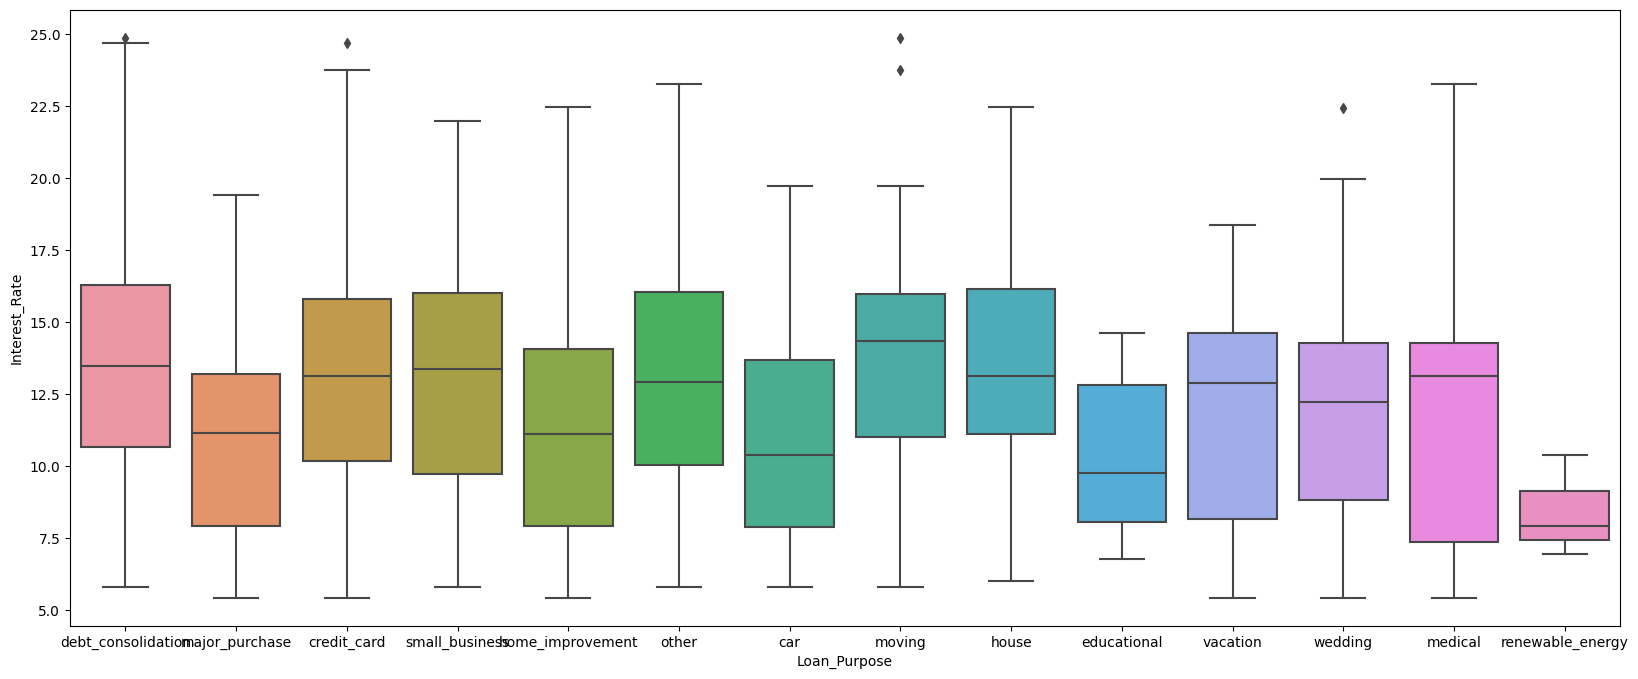

In [43]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df[df.Data_Type=='Train']['Loan_Purpose'],y=df[df.Data_Type=='Train']['Interest_Rate'],order=None)
plt.show()

Now we will identify and list the "Loan_Purpose" categories that have the least variation (lowest variance) in interest rates within the 'Train' subset of the dataset. These categories are sorted based on their variance, with the category having the lowest variance at the beginning of the list and the category with the highest variance at the end.

In [44]:
cols=list(df[df.Data_Type=='Train'].groupby('Loan_Purpose').Interest_Rate.var().sort_values().index)
cols

['renewable_energy',
 'educational',
 'major_purchase',
 'car',
 'wedding',
 'vacation',
 'credit_card',
 'debt_consolidation',
 'home_improvement',
 'other',
 'small_business',
 'medical',
 'house',
 'moving']

In [45]:
d={}
for i in range(0,len(cols)):
    d[cols[i]]=i
print(d)

{'renewable_energy': 0, 'educational': 1, 'major_purchase': 2, 'car': 3, 'wedding': 4, 'vacation': 5, 'credit_card': 6, 'debt_consolidation': 7, 'home_improvement': 8, 'other': 9, 'small_business': 10, 'medical': 11, 'house': 12, 'moving': 13}


In [46]:
df.Loan_Purpose.replace(d,inplace=True)

In [47]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type
0,79542.0,25000.0,25000.00,18.49,1,7.0,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750.0,19750.00,17.27,1,7.0,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100.0,2100.00,14.33,0,2.0,3.50,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000.0,28000.00,16.29,0,6.0,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250.0,17431.82,12.23,1,6.0,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train


Home Ownership(categorical) convert to numeric

In [48]:
df[df.Data_Type=='Train']['Home_Ownership'].value_counts()

MORTGAGE    1018
RENT         999
OWN          177
OTHER          4
NONE           1
Name: Home_Ownership, dtype: int64

<Axes: xlabel='Home_Ownership', ylabel='Interest_Rate'>

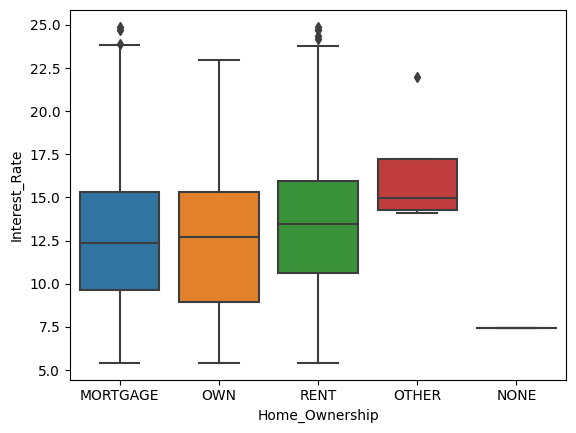

In [49]:
sns.boxplot(x=df[df.Data_Type=='Train']['Home_Ownership'],y=df[df.Data_Type=='Train']['Interest_Rate'])

In [50]:
# Grouping the None and Other to Rent

df.Home_Ownership.replace({'OTHER':'RENT','NONE':'RENT'},inplace=True)

In [51]:
df.Home_Ownership.value_counts()

RENT        1152
MORTGAGE    1147
OWN          200
Name: Home_Ownership, dtype: int64

One Hot Encoding in Home Ownership

In [52]:
df=pd.get_dummies(df,columns=['Home_Ownership'],prefix='H')
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
0,79542.0,25000.0,25000.00,18.49,1,7.0,27.56,VA,8606.56,720-724,11,15210,3.0,5 years,Train,1,0,0
1,75473.0,19750.0,19750.00,17.27,1,7.0,13.39,NY,6737.50,710-714,14,19070,3.0,4 years,Train,1,0,0
2,67265.0,2100.0,2100.00,14.33,0,2.0,3.50,LA,1000.00,690-694,13,893,1.0,< 1 year,Train,0,1,0
3,80167.0,28000.0,28000.00,16.29,0,6.0,19.62,NV,7083.33,710-714,12,38194,1.0,10+ years,Train,1,0,0
4,17240.0,24250.0,17431.82,12.23,1,6.0,23.79,OH,5833.33,730-734,6,31061,2.0,10+ years,Train,1,0,0


Fico Range

In [53]:
# - Take the average of the range and convert to numeric

In [54]:
fico=df.FICO_Range.str.split('-',expand=True)
fico.columns=['Min','Max']
fico=fico.astype(int)
fico.dtypes

Min    int64
Max    int64
dtype: object

In [55]:
df.FICO_Range=(fico.Min+fico.Max)/2

In [56]:
df.FICO_Range

0       722.0
1       712.0
2       692.0
3       712.0
4       732.0
        ...  
2495    707.0
2496    707.0
2497    672.0
2498    677.0
2499    677.0
Name: FICO_Range, Length: 2500, dtype: float64

In [57]:
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
0,79542.0,25000.0,25000.00,18.49,1,7.0,27.56,VA,8606.56,722.0,11,15210,3.0,5 years,Train,1,0,0
1,75473.0,19750.0,19750.00,17.27,1,7.0,13.39,NY,6737.50,712.0,14,19070,3.0,4 years,Train,1,0,0
2,67265.0,2100.0,2100.00,14.33,0,2.0,3.50,LA,1000.00,692.0,13,893,1.0,< 1 year,Train,0,1,0
3,80167.0,28000.0,28000.00,16.29,0,6.0,19.62,NV,7083.33,712.0,12,38194,1.0,10+ years,Train,1,0,0
4,17240.0,24250.0,17431.82,12.23,1,6.0,23.79,OH,5833.33,732.0,6,31061,2.0,10+ years,Train,1,0,0


Open Credit Lines convert to numeric

In [58]:
df.Open_CREDIT_Lines.unique()

array(['11', '14', '13', '12', '6', '2', '5', '24', '7', '10', '8', '4',
       '15', '17', '18', '9', '20', '16', '3', '.', '19', '23', nan, '21',
       '26', '22', '25', '31', '34', '38', '36'], dtype=object)

In [59]:
df.Open_CREDIT_Lines=pd.to_numeric(df.Open_CREDIT_Lines,errors='coerce')

Revolving_CREDIT_Balance convert to numeric


In [60]:
df.Revolving_CREDIT_Balance=pd.to_numeric(df.Revolving_CREDIT_Balance,errors='coerce')

Employment_Length

In [61]:
df.Employment_Length.value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment_Length, dtype: int64

In [63]:
# .5,1,2......10
# <1->.5
# . -> 10+years
# Remove- years, +, < space

In [62]:
df.Employment_Length.replace({'.':'10+ years','< 1 year':0.5},inplace=True)

In [63]:
df.Employment_Length.replace(r'[years +]','',regex=True,inplace=True)

In [64]:
df.Employment_Length.value_counts(dropna=False)

10     655
0.5    249
2      243
3      235
5      202
4      191
1      177
6      163
7      127
8      108
NaN     78
9       72
Name: Employment_Length, dtype: int64

In [65]:
df.Employment_Length=pd.to_numeric(df.Employment_Length,errors='coerce')

In [66]:
df.dtypes

ID                                float64
Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                      float64
Debt_To_Income_Ratio              float64
State                              object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
Data_Type                          object
H_MORTGAGE                          uint8
H_OWN                               uint8
H_RENT                              uint8
dtype: object

Remove State and ID columns

In [67]:
df.drop(columns=['ID','State'],inplace=True)

In [68]:
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
0,25000.0,25000.00,18.49,1,7.0,27.56,8606.56,722.0,11.0,15210.0,3.0,5.0,Train,1,0,0
1,19750.0,19750.00,17.27,1,7.0,13.39,6737.50,712.0,14.0,19070.0,3.0,4.0,Train,1,0,0
2,2100.0,2100.00,14.33,0,2.0,3.50,1000.00,692.0,13.0,893.0,1.0,0.5,Train,0,1,0
3,28000.0,28000.00,16.29,0,6.0,19.62,7083.33,712.0,12.0,38194.0,1.0,10.0,Train,1,0,0
4,24250.0,17431.82,12.23,1,6.0,23.79,5833.33,732.0,6.0,31061.0,2.0,10.0,Train,1,0,0


In [69]:
df.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                         int64
Loan_Purpose                      float64
Debt_To_Income_Ratio              float64
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
Data_Type                          object
H_MORTGAGE                          uint8
H_OWN                               uint8
H_RENT                              uint8
dtype: object

In [70]:
df.drop(columns=['Inquiries_in_the_Last_6_Months'],inplace=True)

In [71]:
df.dtypes

Amount_Requested              float64
Amount_Funded_By_Investors    float64
Interest_Rate                 float64
Loan_Length                     int64
Loan_Purpose                  float64
Debt_To_Income_Ratio          float64
Monthly_Income                float64
FICO_Range                    float64
Open_CREDIT_Lines             float64
Revolving_CREDIT_Balance      float64
Employment_Length             float64
Data_Type                      object
H_MORTGAGE                      uint8
H_OWN                           uint8
H_RENT                          uint8
dtype: object

Null Value Imputtaion

In [72]:
df.isna().sum()

Amount_Requested                5
Amount_Funded_By_Investors      5
Interest_Rate                 300
Loan_Length                     0
Loan_Purpose                    1
Debt_To_Income_Ratio            1
Monthly_Income                  3
FICO_Range                      0
Open_CREDIT_Lines               9
Revolving_CREDIT_Balance        5
Employment_Length              78
Data_Type                       0
H_MORTGAGE                      0
H_OWN                           0
H_RENT                          0
dtype: int64

In [75]:
# we use mean method for Numeric Continuous
#we use mode for  Categorical

In [73]:
df.nunique()

Amount_Requested               380
Amount_Funded_By_Investors     709
Interest_Rate                  265
Loan_Length                      2
Loan_Purpose                    14
Debt_To_Income_Ratio          1669
Monthly_Income                 631
FICO_Range                      38
Open_CREDIT_Lines               29
Revolving_CREDIT_Balance      2348
Employment_Length               11
Data_Type                        2
H_MORTGAGE                       2
H_OWN                            2
H_RENT                           2
dtype: int64

We will define a function to iterate through the numerical columns and fill missing values using mean

In [74]:
num_cols=['Amount_Requested','Amount_Funded_By_Investors','Debt_To_Income_Ratio','Revolving_CREDIT_Balance','Monthly_Income']

In [75]:
def mis_nums(data):
    df[data].fillna(df[data].mean(),inplace=True)

In [76]:
for i in num_cols:
    mis_nums(i)

In [77]:
df.isna().sum()

Amount_Requested                0
Amount_Funded_By_Investors      0
Interest_Rate                 300
Loan_Length                     0
Loan_Purpose                    1
Debt_To_Income_Ratio            0
Monthly_Income                  0
FICO_Range                      0
Open_CREDIT_Lines               9
Revolving_CREDIT_Balance        0
Employment_Length              78
Data_Type                       0
H_MORTGAGE                      0
H_OWN                           0
H_RENT                          0
dtype: int64

We will define a function to iterate through the numerical columns and fill missing values using mode

In [78]:
cat_cols=['Loan_Purpose','Employment_Length','Open_CREDIT_Lines']

In [79]:
def mis_cat(data):
    df[data].fillna(df[data].mode()[0],inplace=True)

In [80]:
for i in cat_cols:
    mis_cat(i)

In [81]:
df.isna().sum()

Amount_Requested                0
Amount_Funded_By_Investors      0
Interest_Rate                 300
Loan_Length                     0
Loan_Purpose                    0
Debt_To_Income_Ratio            0
Monthly_Income                  0
FICO_Range                      0
Open_CREDIT_Lines               0
Revolving_CREDIT_Balance        0
Employment_Length               0
Data_Type                       0
H_MORTGAGE                      0
H_OWN                           0
H_RENT                          0
dtype: int64

In [82]:
df.Loan_Purpose.astype(int)

0       7
1       7
2       2
3       6
4       6
       ..
2495    8
2496    7
2497    6
2498    6
2499    7
Name: Loan_Purpose, Length: 2500, dtype: int64

In [83]:
df.Loan_Purpose.value_counts()

7.0     1308
6.0      444
9.0      200
8.0      152
2.0      101
10.0      87
3.0       50
4.0       39
11.0      30
13.0      29
5.0       21
12.0      20
1.0       15
0.0        4
Name: Loan_Purpose, dtype: int64

Checking for Outliers

In [82]:
# Numreic continuous columns

In [84]:
out_cols=['Amount_Requested','Amount_Funded_By_Investors','Debt_To_Income_Ratio','Revolving_CREDIT_Balance','Monthly_Income']

In [90]:
# Visual Representation

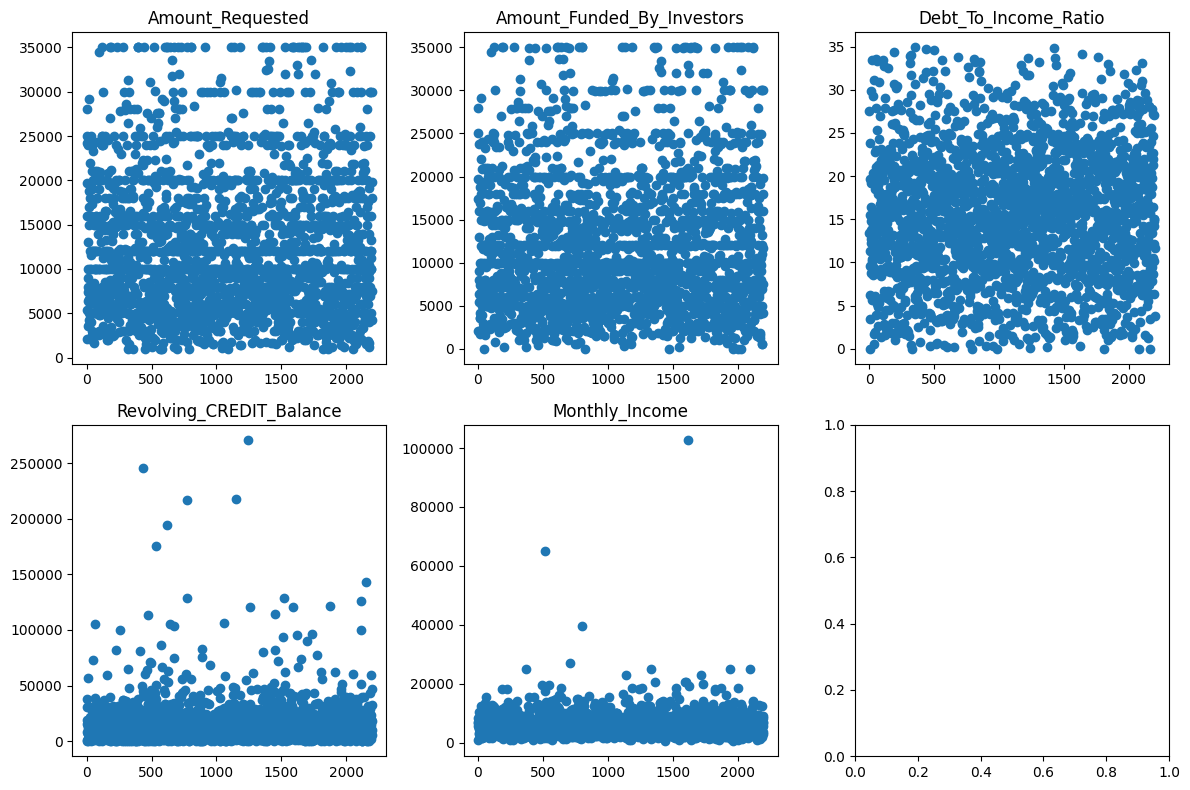

In [85]:
f,ax=plt.subplots(2,3,figsize=(12,8),dpi=100)
col_index=0
try:
    for i in range(2):
        for j in range(3):
            ax[i,j].scatter(y=df[df.Data_Type=='Train'][out_cols[col_index]],x=df[df.Data_Type=='Train'][out_cols[col_index]].index)
            ax[i,j].set_title(out_cols[col_index])
            col_index+=1
except:
    pass
plt.tight_layout()
plt.show()

The overall result is a 2x3 grid of scatter plots, each showing the relationship between specific columns from the DataFrame df where "Data_Type" is 'Train'. The titles of the subplots correspond to the names of the columns.

In [92]:
# we can use box plots as well

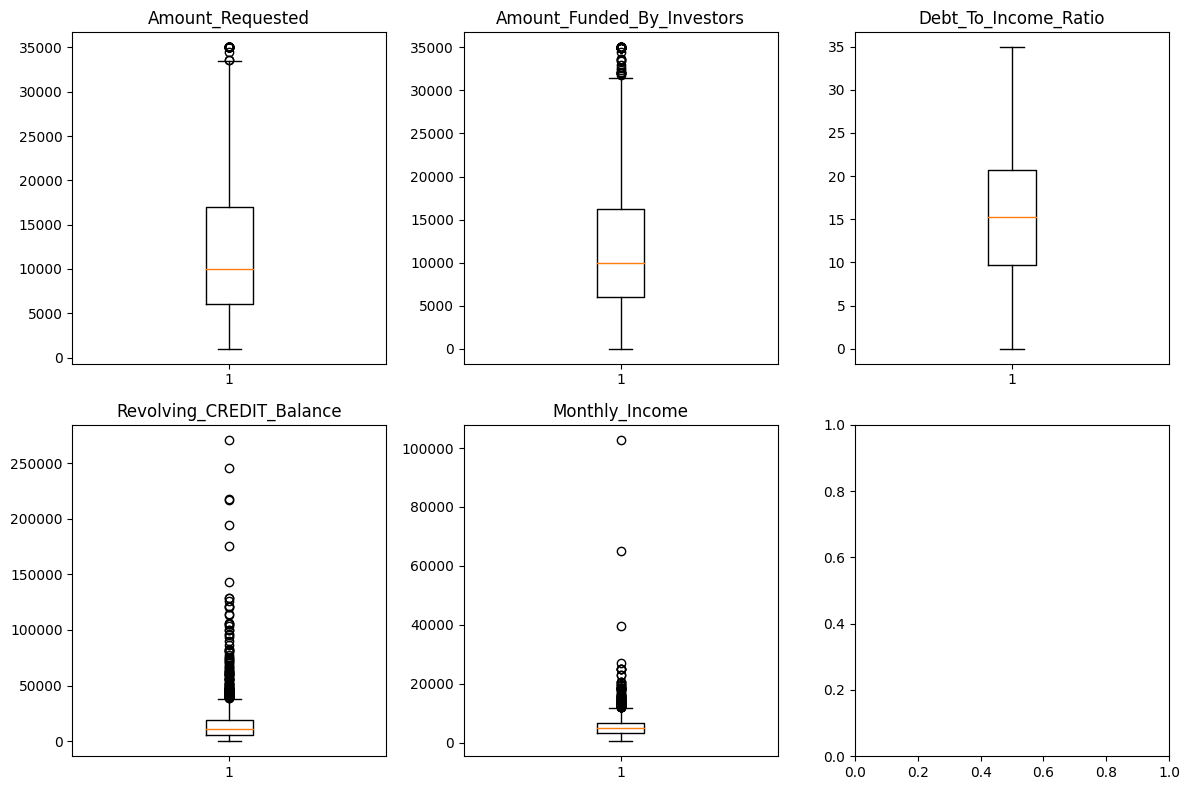

In [86]:
f,ax=plt.subplots(2,3,figsize=(12,8),dpi=100)
col_index=0
try:
    for i in range(2):
        for j in range(3):
            ax[i,j].boxplot(df[df.Data_Type=='Train'][out_cols[col_index]])
            ax[i,j].set_title(out_cols[col_index])
            col_index+=1
except:
    pass
plt.tight_layout()
plt.show()

Treating Outliers

Capping the values based on Visual representation

In [94]:
# Revolving Credit Balance and Monthly income have ouliers
# Revolving Credit Balance- >150000 is an outlier
# Monthly income- >25000 is an outlier

In [95]:
# Either we can drop the rows that have outliers or we can cap

In [96]:
## Cap the values upto 150000 for Revolving Credit Balance

In [87]:
df.Revolving_CREDIT_Balance=np.where(df.Revolving_CREDIT_Balance>150000,150000,df.Revolving_CREDIT_Balance)

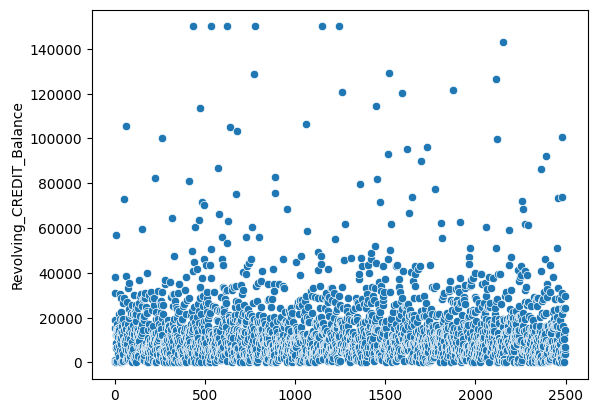

In [88]:
sns.scatterplot(y=df.Revolving_CREDIT_Balance,x=df.Revolving_CREDIT_Balance.index)
plt.show()

In [89]:
# Monthly Income cap the value upto 25000

df.Monthly_Income=np.where(df.Monthly_Income>25000,25000,df.Monthly_Income)

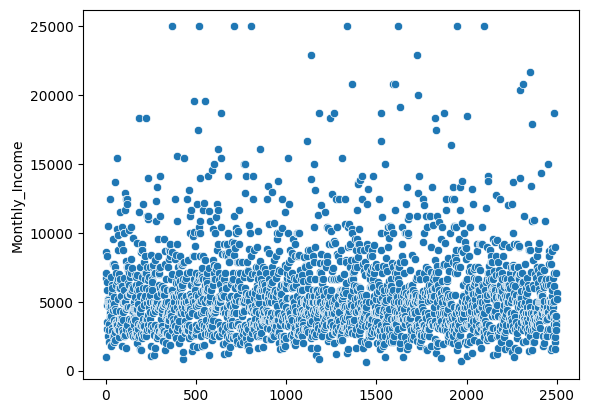

In [90]:
sns.scatterplot(y=df.Monthly_Income,x=df.Monthly_Income.index)
plt.show()

In [101]:
# There are 3 methods to cap the values
# - 1- Cap the values on the basis of visual representation
# - 2- Cap the values between 1st and 99th percentile values- Blanket Method
# - 3- IQR method (Widely used)

Coorelation

In [91]:
df[df.Data_Type=='Train'].corr()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT
Amount_Requested,1.000000,0.965867,0.329797,0.407855,0.052663,0.073063,0.449923,0.083434,0.194953,0.299393,0.138755,0.151609,-0.043714,-0.127372
Amount_Funded_By_Investors,0.965867,1.000000,0.335196,0.397121,0.045730,0.086813,0.427565,0.072756,0.185166,0.276720,0.147436,0.138774,-0.050692,-0.110757
Interest_Rate,0.329797,0.335196,1.000000,0.422772,0.092098,0.177837,0.031060,-0.708394,0.091437,0.068981,0.037129,-0.079369,-0.021671,0.090576
Loan_Length,0.407855,0.397121,0.422772,1.000000,0.037094,0.029658,0.095963,0.012136,0.044508,0.064447,0.055497,0.073622,-0.038027,-0.052453
Loan_Purpose,0.052663,0.045730,0.092098,0.037094,1.000000,0.019760,0.003386,-0.039505,-0.026027,0.012325,0.035834,0.002818,-0.034645,0.016552
Debt_To_Income_Ratio,0.073063,0.086813,0.177837,0.029658,0.019760,1.000000,-0.178442,-0.225496,0.369277,0.192318,0.043126,-0.015196,0.020743,0.002207
Monthly_Income,0.449923,0.427565,0.031060,0.095963,0.003386,-0.178442,1.000000,0.120194,0.218862,0.409715,0.088387,0.244960,-0.079436,-0.202186
FICO_Range,0.083434,0.072756,-0.708394,0.012136,-0.039505,-0.225496,0.120194,1.000000,-0.091355,-0.002725,0.024452,0.154538,0.019108,-0.164587
Open_CREDIT_Lines,0.194953,0.185166,0.091437,0.044508,-0.026027,0.369277,0.218862,-0.091355,1.000000,0.294556,0.063244,0.149521,-0.026520,-0.135992
Revolving_CREDIT_Balance,0.299393,0.276720,0.068981,0.064447,0.012325,0.192318,0.409715,-0.002725,0.294556,1.000000,0.129681,0.197097,-0.036619,-0.177650


In [107]:
#Upon checking the coorelation between features we observe that Amount_Requested & Amount_Funded_By_Investors have same coorelation so we drop one which is not logically coorelated to target after checking with the SME or client

In [108]:
# Drop the Amount Funded by Investors

In [92]:
df.drop('Amount_Funded_By_Investors',axis=1,inplace=True)

In [93]:
df.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
0,25000.0,18.49,1,7.0,27.56,8606.56,722.0,11.0,15210.0,5.0,Train,1,0,0
1,19750.0,17.27,1,7.0,13.39,6737.50,712.0,14.0,19070.0,4.0,Train,1,0,0
2,2100.0,14.33,0,2.0,3.50,1000.00,692.0,13.0,893.0,0.5,Train,0,1,0
3,28000.0,16.29,0,6.0,19.62,7083.33,712.0,12.0,38194.0,10.0,Train,1,0,0
4,24250.0,12.23,1,6.0,23.79,5833.33,732.0,6.0,31061.0,10.0,Train,1,0,0


In [111]:
# Preprocessing is done
# Now is the time to split the data into train and test as before

In [94]:
train_data=df[df.Data_Type=='Train']
train_data.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
0,25000.0,18.49,1,7.0,27.56,8606.56,722.0,11.0,15210.0,5.0,Train,1,0,0
1,19750.0,17.27,1,7.0,13.39,6737.50,712.0,14.0,19070.0,4.0,Train,1,0,0
2,2100.0,14.33,0,2.0,3.50,1000.00,692.0,13.0,893.0,0.5,Train,0,1,0
3,28000.0,16.29,0,6.0,19.62,7083.33,712.0,12.0,38194.0,10.0,Train,1,0,0
4,24250.0,12.23,1,6.0,23.79,5833.33,732.0,6.0,31061.0,10.0,Train,1,0,0


In [95]:
test_data=df[df.Data_Type=='Test']
test_data.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,Data_Type,H_MORTGAGE,H_OWN,H_RENT
2200,5000.0,NaN,1,13.0,12.59,4416.67,692.0,13.0,7686.0,0.5,Test,0,0,1
2201,18000.0,NaN,1,7.0,4.93,5258.50,712.0,6.0,11596.0,10.0,Test,0,0,1
2202,7200.0,NaN,1,7.0,25.16,3750.00,752.0,13.0,7283.0,6.0,Test,1,0,0
2203,7200.0,NaN,0,7.0,17.27,3416.67,792.0,14.0,4838.0,10.0,Test,1,0,0
2204,22000.0,NaN,1,7.0,18.28,6083.33,722.0,9.0,20181.0,8.0,Test,1,0,0


In [96]:
train_data.drop('Data_Type',axis=1,inplace=True)

In [97]:
test_data.drop('Data_Type',axis=1,inplace=True)

In [98]:
train_data.shape,test_data.shape

((2200, 13), (300, 13))

In [99]:
test_data.drop('Interest_Rate',axis=1,inplace=True)

In [100]:
# The train_data again we have split into train and validation data (80-20 ratio)

In [101]:
from sklearn.model_selection import train_test_split

In [105]:
random_seed = 42

new_train_data, val_data = train_test_split(train_data, train_size=0.80, random_state=random_seed)


In [106]:
new_train_data.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT
1656,6000.0,13.99,0,8.0,12.98,10000.00,667.0,9.0,8230.0,5.0,1,0,0
752,15000.0,16.77,0,7.0,7.29,7916.67,677.0,5.0,5355.0,6.0,0,0,1
892,8000.0,16.29,0,7.0,15.76,3750.00,667.0,8.0,7374.0,6.0,0,0,1
1041,16450.0,21.97,1,7.0,25.59,2833.33,672.0,23.0,12670.0,5.0,1,0,0
1179,12000.0,14.74,0,7.0,4.62,4500.00,697.0,3.0,7956.0,10.0,0,0,1


In [107]:
val_data.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT
1451,9600.0,11.14,0,7.0,20.58,3833.33,707.0,9.0,44403.0,5.0,1,0,0
1334,5000.0,14.33,0,6.0,28.51,2750.00,692.0,14.0,5957.0,3.0,0,0,1
1761,32000.0,16.29,1,7.0,15.14,7055.00,727.0,8.0,16174.0,6.0,0,0,1
1735,9250.0,12.12,0,7.0,29.46,3333.33,687.0,10.0,5440.0,10.0,1,0,0
1576,20000.0,10.62,0,7.0,12.58,2416.67,762.0,5.0,6011.0,1.0,1,0,0


In [108]:
train_data.shape

(2200, 13)

In [109]:
new_train_data.shape

(1760, 13)

In [110]:
val_data.shape

(440, 13)

Modeling

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
# variable_name=class_name() we assign a variable name to the class where class is LinearRegression

In [113]:
lm=LinearRegression()

In [114]:
# lm.fit()- To fit the model on the data
# lm.predict()- To get the prediction from the sample
# lm.score()- It measures the R- Square

In [118]:
# lm.fit(features,target) # From the training data (new_train_data). We seperate the target and features from the new train data

In [116]:
train_features=new_train_data.drop('Interest_Rate',axis=1)
train_features.head()

,Amount_Requested,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT
1656,6000.0,0,8.0,12.98,10000.00,667.0,9.0,8230.0,5.0,1,0,0
752,15000.0,0,7.0,7.29,7916.67,677.0,5.0,5355.0,6.0,0,0,1
892,8000.0,0,7.0,15.76,3750.00,667.0,8.0,7374.0,6.0,0,0,1
1041,16450.0,1,7.0,25.59,2833.33,672.0,23.0,12670.0,5.0,1,0,0
1179,12000.0,0,7.0,4.62,4500.00,697.0,3.0,7956.0,10.0,0,0,1


In [117]:
train_target=new_train_data['Interest_Rate']
train_target.head()

1656    13.99
752     16.77
892     16.29
1041    21.97
1179    14.74
Name: Interest_Rate, dtype: float64

In [119]:
# Validation features

val_features=val_data.drop('Interest_Rate',axis=1)
val_features.head()

,Amount_Requested,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Employment_Length,H_MORTGAGE,H_OWN,H_RENT
1451,9600.0,0,7.0,20.58,3833.33,707.0,9.0,44403.0,5.0,1,0,0
1334,5000.0,0,6.0,28.51,2750.00,692.0,14.0,5957.0,3.0,0,0,1
1761,32000.0,1,7.0,15.14,7055.00,727.0,8.0,16174.0,6.0,0,0,1
1735,9250.0,0,7.0,29.46,3333.33,687.0,10.0,5440.0,10.0,1,0,0
1576,20000.0,0,7.0,12.58,2416.67,762.0,5.0,6011.0,1.0,1,0,0


In [120]:
# Validation Target
val_target=val_data.Interest_Rate
val_target.head()

1451    11.14
1334    14.33
1761    16.29
1735    12.12
1576    10.62
Name: Interest_Rate, dtype: float64

In [121]:
lm.fit(train_features,train_target)

LinearRegression()

In [ ]:
We get the coefficients(Betas)

In [122]:
lm.coef_

array([ 1.51589322e-04,  3.31437473e+00,  9.49862293e-02, -6.71329306e-03,
       -3.17202391e-05, -8.70401089e-02, -2.35766284e-02, -4.01832594e-06,
        1.02172855e-02, -3.26602419e+00, -2.87369054e+00, -3.17195492e+00])

In [123]:
dict(zip(train_features.columns,lm.coef_))

{'Amount_Requested': 0.0001515893223191153,
 'Loan_Length': 3.3143747297485096,
 'Loan_Purpose': 0.09498622931106962,
 'Debt_To_Income_Ratio': -0.006713293062522999,
 'Monthly_Income': -3.1720239108357084e-05,
 'FICO_Range': -0.08704010888160421,
 'Open_CREDIT_Lines': -0.023576628400986052,
 'Revolving_CREDIT_Balance': -4.018325939547651e-06,
 'Employment_Length': 0.01021728554913547,
 'H_MORTGAGE': -3.2660241941408,
 'H_OWN': -2.873690543562422,
 'H_RENT': -3.1719549162343585}

In [124]:
# Intercept (Beta_Zero)

In [125]:
lm.intercept_

75.09487192444135

Prediction

In [126]:
lm.predict(train_features)

array([14.84400589, 15.5573506 , 15.36308972, ...,  8.24831953,
        7.46152416, 12.62475924])

In [128]:
lm.predict(val_features)

array([11.81236918, 12.4170409 , 16.95716724, 13.64043701,  8.90804422,
       15.40705623, 12.46091668,  8.57528045, 18.52489963, 11.65733539,
        6.59098247, 15.78872043, 14.11759774, 14.79409282, 13.18697192,
       11.29339973,  8.0272513 , 13.29736998, 17.28940292,  6.07815333,
       13.97356947,  7.66767479, 14.90949618, 17.05295978, 18.80190618,
       13.81505049,  6.03160611, 13.28295609,  9.12390895, 13.23709459,
        6.00730296, 12.17008917, 11.96729111, 12.64306083, 10.82908393,
       16.07254165, 13.85843497,  4.32168826, 21.33460575, 13.34374798,
       13.74403831, 10.89925263, 10.6742118 , 14.86971232, 17.09724901,
        9.86757263,  8.62424226, 15.28815339, 14.85200674, 15.03378062,
       15.21484522, 18.91199187, 12.50019877, 15.85538762, 17.74371243,
       12.81293291, 12.9624057 , 17.16712318, 15.30574064, 11.39736615,
       12.27513738, 16.37656468,  9.1778654 , 11.17625277, 16.46366743,
        8.90097372,  9.75729353, 15.05014543,  8.26563419, 11.78